In [409]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

In [410]:
df = pd.read_csv('WeightedPriceDaily.csv',index_col='Timestamp',parse_dates=True)


In [411]:
df.head()

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


In [412]:
df.index

DatetimeIndex(['2011-12-31', '2012-01-01', '2012-01-02', '2012-01-03',
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-08', '2012-01-09',
               ...
               '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-10',
               '2019-08-11', '2019-08-12'],
              dtype='datetime64[ns]', name='Timestamp', length=2779, freq=None)

In [413]:
df = df.resample(rule='D').mean()  #Daily sampling

In [414]:
df.head()

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


In [415]:
df.index

DatetimeIndex(['2011-12-31', '2012-01-01', '2012-01-02', '2012-01-03',
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-08', '2012-01-09',
               ...
               '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-10',
               '2019-08-11', '2019-08-12'],
              dtype='datetime64[ns]', name='Timestamp', length=2782, freq='D')

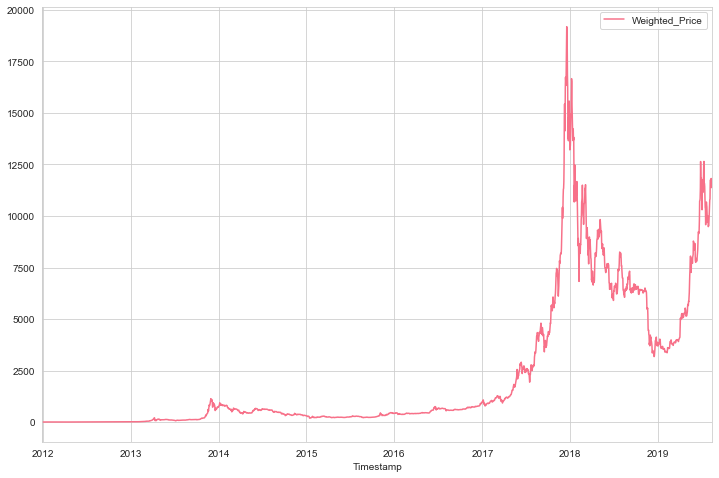

In [416]:
df.plot(figsize=(12,8))

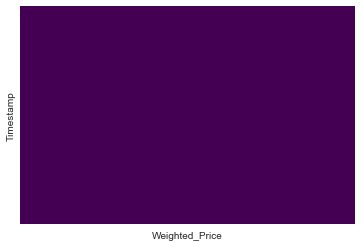

In [417]:
#Checking for missing value with heatmap of the data
sns.set_palette("husl")
sns.set_style('whitegrid')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [418]:
df = df.dropna()

In [419]:
df = df.resample(rule='MS').mean()  #monthly sampling

In [420]:
df.index

DatetimeIndex(['2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
      

In [421]:
from statsmodels.tsa.seasonal import seasonal_decompose

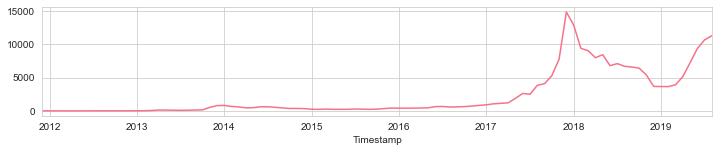

In [422]:
results = seasonal_decompose(df['Weighted_Price'])
results.observed.plot(figsize=(12,2))

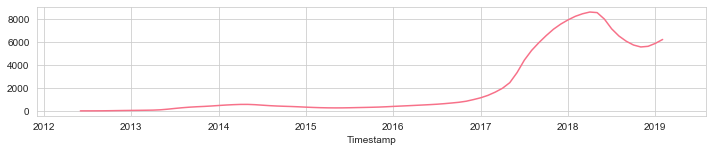

In [423]:
results.trend.plot(figsize=(12,2))

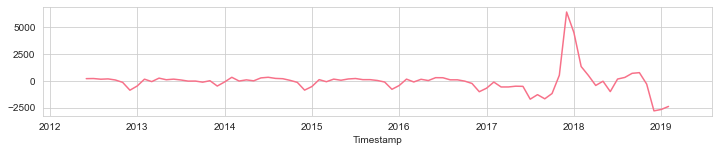

In [424]:
results.resid.plot(figsize=(12,2))

## RNN model 

### Train test split


In [425]:
len(df)

93

In [426]:
#Keeping last one year for testing 
train = df.iloc[:81]
test = df.iloc[81:]

#### Scaling data


In [427]:
from sklearn.preprocessing import MinMaxScaler

In [428]:
scaler = MinMaxScaler()

In [429]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [430]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [431]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [432]:
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [433]:
X,y = generator[0]

In [434]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00000000e+00 1.17078165e-04 5.26378615e-05 3.30564374e-05
 3.40355511e-05 3.84034536e-05]
Predict this y: 
 [[0.00010108]]


#### Building the model

In [435]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [436]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [437]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [438]:
# fit model
model.fit_generator(generator,epochs=150)

Epoch 1/150
75/75 [==============================] - 3s 36ms/step - loss: 0.0334
Epoch 2/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0158
Epoch 3/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0138
Epoch 4/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0129
Epoch 5/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0108
Epoch 6/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0116
Epoch 7/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0084
Epoch 8/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0088
Epoch 9/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0083
Epoch 10/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0066
Epoch 11/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 12/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0072
Epoch 13/150
75/75 [=====

Epoch 100/150
75/75 [==============================] - 1s 15ms/step - loss: 7.9041e-04
Epoch 101/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 102/150
75/75 [==============================] - 1s 14ms/step - loss: 6.9421e-04
Epoch 103/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0021
Epoch 104/150
75/75 [==============================] - 1s 14ms/step - loss: 0.0030: 0s - loss:
Epoch 105/150
75/75 [==============================] - 1s 15ms/step - loss: 0.0022: 1s 
Epoch 106/150
75/75 [==============================] - 1s 13ms/step - loss: 7.8731e-04
Epoch 107/150
75/75 [==============================] - 1s 14ms/step - loss: 7.1870e-04
Epoch 108/150
75/75 [==============================] - 1s 15ms/step - loss: 7.5470e-04
Epoch 109/150
75/75 [==============================] - 1s 15ms/step - loss: 4.2222e-04: 0s - loss: 4.8085
Epoch 110/150
75/75 [==============================] - 1s 14ms/step - loss: 3.8902e-04
Epoch 111/150
75/75 [==

In [439]:
model.history.history.keys()

dict_keys(['loss'])

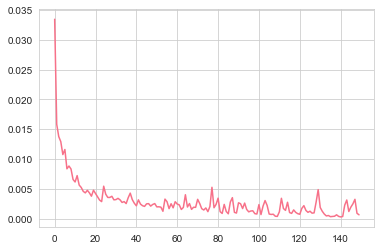

In [440]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate the model

In [441]:
first_eval_batch = scaled_train[-6:]

In [442]:
first_eval_batch

array([[0.60804811],
       [0.53783024],
       [0.56851278],
       [0.4569907 ],
       [0.47807897],
       [0.45058792]])

In [443]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [444]:
model.predict(first_eval_batch)

array([[0.48050573]], dtype=float32)

In [445]:
scaled_test[0]

array([0.44381555])

In [446]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [447]:
current_batch.shape

(1, 6, 1)

In [448]:
current_batch

array([[[0.60804811],
        [0.53783024],
        [0.56851278],
        [0.4569907 ],
        [0.47807897],
        [0.45058792]]])

In [449]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.53783024],
        [ 0.56851278],
        [ 0.4569907 ],
        [ 0.47807897],
        [ 0.45058792],
        [99.        ]]])

In [450]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [451]:
test_predictions

[array([0.48050573], dtype=float32),
 array([0.49643767], dtype=float32),
 array([0.5009825], dtype=float32),
 array([0.52895176], dtype=float32),
 array([0.52842605], dtype=float32),
 array([0.5317851], dtype=float32),
 array([0.52463025], dtype=float32),
 array([0.51912856], dtype=float32),
 array([0.5154234], dtype=float32),
 array([0.50910556], dtype=float32),
 array([0.5078645], dtype=float32),
 array([0.5071687], dtype=float32)]

In [452]:
scaled_test

array([[0.44381555],
       [0.43210214],
       [0.36288223],
       [0.24714036],
       [0.2463044 ],
       [0.245626  ],
       [0.26381908],
       [0.34610259],
       [0.4869555 ],
       [0.63049198],
       [0.71869637],
       [0.76040935]])

### Inverse Transformations and Compare

In [453]:
true_predictions = scaler.inverse_transform(test_predictions)

In [454]:
true_predictions

array([[7133.15322057],
       [7369.51603101],
       [7436.94252771],
       [7851.8882834 ],
       [7844.08891683],
       [7893.92262466],
       [7787.77519107],
       [7706.15331664],
       [7651.18458369],
       [7557.45423687],
       [7539.04171865],
       [7528.71949575]])

In [455]:
test

,Weighted_Price
Timestamp,
2018-09-01,6588.825363
2018-10-01,6415.047708
2018-11-01,5388.115814
2018-12-01,3670.993747
2019-01-01,3658.591625
2019-02-01,3648.527128
2019-03-01,3918.435802
2019-04-01,5139.176480
2019-05-01,7228.840505


In [456]:
test['Predictions'] = true_predictions

D:\Ana3\envs\tf_gpu4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [457]:
test

,Weighted_Price,Predictions
Timestamp,,
2018-09-01,6588.825363,7133.153221
2018-10-01,6415.047708,7369.516031
2018-11-01,5388.115814,7436.942528
2018-12-01,3670.993747,7851.888283
2019-01-01,3658.591625,7844.088917
2019-02-01,3648.527128,7893.922625
2019-03-01,3918.435802,7787.775191
2019-04-01,5139.176480,7706.153317
2019-05-01,7228.840505,7651.184584


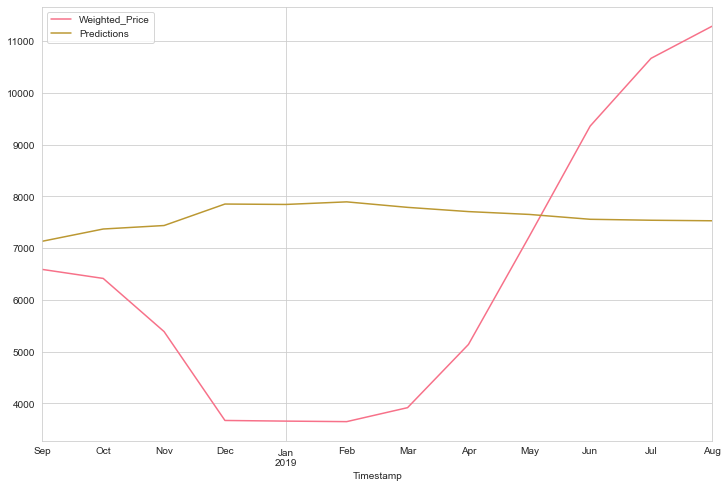

In [458]:
test.plot(figsize=(12,8))

In [459]:
model.save('my_rnn_model.h5')